In [1]:
#2329793
#Prashan Basnet


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# I have used os, numpy, pandas, and matplotlib to handle files, perform numerical tasks, manage data, and create plots.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# train_test_split is used to divide data into training and testing sets.
# I have used LabelEncoder to convert categorical text labels into numerical values.

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# I have used Tokenizer to convert text into sequences of numbers that the model can understand.
# pad_sequences ensures that all input sequences are the same length.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense

# I have used Sequential to build the model layer-by-layer.
# Embedding layer turns word indices into dense vectors for input to RNNs.
# LSTM and SimpleRNN are used to learn patterns in text sequences.

import re  # Used for cleaning text using regular expressions.

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# I have used stopwords to remove common uninformative words like 'the', 'is', etc.
# WordNetLemmatizer helps to reduce words to their root forms (e.g., 'running' → 'run').

nltk.download('stopwords')     # I have used this to access built-in stopwords from NLTK.
nltk.download('wordnet')       # Required for using the WordNet lemmatizer.
nltk.download('omw-1.4')       # Supports lemmatization with additional word mappings.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# I have used this path to locate the dataset file
csv_path = '/content/truevsfakenews.csv'

# Check if the file exists at the specified path
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"File not found: {csv_path}")

# I have used read_csv with header=None to load a file that doesn't have a header row
# and manually assigned column names as 'text' and 'label'

data = pd.read_csv(csv_path, header=None, names=['text', 'label'], on_bad_lines='skip')


# Strip unwanted spaces from column names, if any
data.columns = data.columns.str.strip()

# I have used print statements to confirm that the dataset loaded correctly
print("Column names:", data.columns.tolist())
print("Sample data:\n", data.head())


Column names: ['text', 'label']
Sample data:
                                                 text  label
0                                               text  label
1  WASHINGTON (Reuters) - The Republican and Demo...   true
2  Women should get as far away from Oklahoma as ...   fake
3  Another huge crowd of Americans tuned in last ...   fake
4  Donald Trump is desperate to stop the investig...   fake


In [4]:
data = data.dropna(subset=['text', 'label'])  # I have used this to remove rows where 'text' or 'label' is missing

data['text'] = data['text'].astype(str)  # Ensures that all text entries are treated as string type


In [5]:
# ----------- Text Preprocessing and Cleaning -----------

!pip install contractions

import contractions

# I have used stopwords and WordNetLemmatizer to clean and normalize the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = contractions.fix(text)  # I have used this to expand contractions like "don't" to "do not"
    text = text.lower()  # Convert to lowercase for consistency
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r"[^a-zA-Z\s]", '', text)  # I have used this to remove punctuation and numbers
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(tokens)

# Apply preprocessing to each text entry
data['cleaned_text'] = data['text'].apply(preprocess_text)

# I have used this to drop rows where the cleaned text became empty
data = data[data['cleaned_text'].str.strip() != '']


In [6]:
# ----------- Word Cloud Setup for Text Visualization -----------

!pip install wordcloud

from wordcloud import WordCloud  # I have used WordCloud to generate a visual representation of the most frequent words
import matplotlib.pyplot as plt  # Already imported earlier; used again here for plotting the word cloud


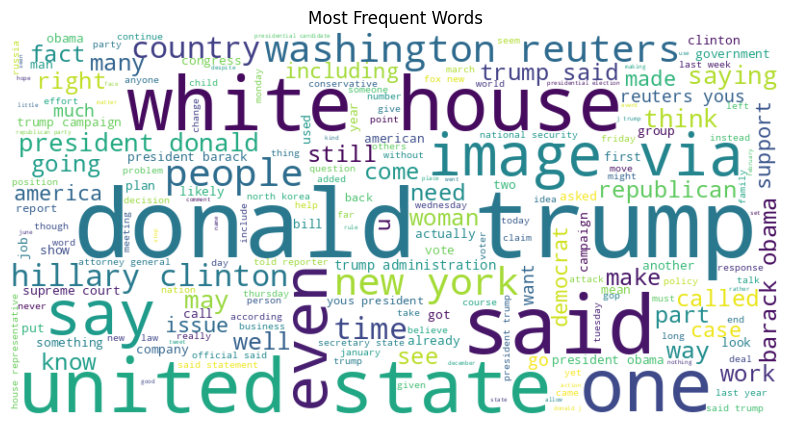

In [7]:
# ----------- Generate and Display Word Cloud -----------

# I have used this to combine all cleaned text into a single string for visualization
all_words = ' '.join(data['cleaned_text'])

# Generate the word cloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # Display the image with smooth interpolation
plt.axis('off')  # I have used this to hide axis lines and ticks
plt.title('Most Frequent Words')
plt.show()


In [8]:
# ----------- Filter Labels, Tokenize Text, and Prepare Data for Training -----------

# I have used this to check unique labels in the dataset
print("Unique labels in dataset:", data['label'].unique())

# I have filtered the dataset to keep only the 'true' and 'fake' labels
valid_labels = ['true', 'fake']
data = data[data['label'].isin(valid_labels)]

# Raise error if dataset is empty after filtering
if data.empty:
    raise ValueError("Dataset is empty after filtering labels.")

# I have used Tokenizer to convert text into numerical sequences (tokens)
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['cleaned_text'])
X_sequences = tokenizer.texts_to_sequences(data['cleaned_text'])

# I have used pad_sequences to ensure all input sequences are the same length
max_len = 100
X_pad = pad_sequences(X_sequences, maxlen=max_len, padding='post')

# I have used LabelEncoder to convert labels into numerical form (0 for 'fake' and 1 for 'true')
le = LabelEncoder()
y = le.fit_transform(data['label'])

# Train-test split to separate data into training and testing sets
X_train_pad, X_test_pad, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Convert data into numpy arrays for training the model
X_train_pad = np.array(X_train_pad, dtype='int32')
X_test_pad = np.array(X_test_pad, dtype='int32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')

# Display the shapes of the prepared data
print("Shapes:")
print("X_train_pad:", X_train_pad.shape)
print("y_train:", y_train.shape)


Unique labels in dataset: ['label' 'true' 'fake']
Shapes:
X_train_pad: (15998, 100)
y_train: (15998,)


In [9]:
# ----------- Build and Compile RNN Model -----------

# I have used Sequential to build the model layer by layer
rnn_model = Sequential()

# I have used the Embedding layer to convert input tokens into dense vectors of fixed size (128)
rnn_model.add(Embedding(input_dim=10000, output_dim=128))

# I have used SimpleRNN to process sequential data with 64 hidden units
rnn_model.add(SimpleRNN(64))

# I have used Dense with a sigmoid activation to output a probability for the binary classification task
rnn_model.add(Dense(1, activation='sigmoid'))

# I have used binary_crossentropy loss function, adam optimizer, and accuracy as the evaluation metric
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# I have used summary() to display the model architecture
rnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# ----------- Train the RNN Model -----------

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# I have defined a function to train the model with checkpointing and early stopping
def train_model(model, X_train, y_train, X_val, y_val, model_name):
    # I have used ModelCheckpoint to save the best model based on validation accuracy
    checkpoint = ModelCheckpoint(f'best_{model_name}_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

    # I have used EarlyStopping to stop training if validation loss doesn't improve for 3 consecutive epochs
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

    # Train the model with the specified parameters, callbacks, and validation data
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stop])

    return history

# I have used the function to train the RNN model and store the training history
rnn_history = train_model(rnn_model, X_train_pad, y_train, X_test_pad, y_test, 'rnn')


Epoch 1/10
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9087 - loss: 0.2464
Epoch 1: val_accuracy improved from -inf to 0.96850, saving model to best_rnn_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9090 - loss: 0.2458 - val_accuracy: 0.9685 - val_loss: 0.0999
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9682 - loss: 0.1015
Epoch 2: val_accuracy improved from 0.96850 to 0.96950, saving model to best_rnn_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.9682 - loss: 0.1015 - val_accuracy: 0.9695 - val_loss: 0.0965
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9805 - loss: 0.0660
Epoch 3: val_accuracy improved from 0.96950 to 0.97025, saving model to best_rnn_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9805 - loss: 0.0661 - val_accuracy: 0.9703 - val_loss: 0.0975
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9876 - loss: 0.0438
Epoch 4: val_accuracy improved from 0.97025 to 0.97825, saving model to best_rnn_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9876 - loss: 0.0438 - val_accuracy: 0.9783 - val_loss: 0.0763
Epoch 5/10
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9896 - loss: 0.0426
Epoch 5: val_accuracy did not improve from 0.97825
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9896 - loss: 0.0426 - val_accuracy: 0.9772 - val_loss: 0.0880
Epoch 6/10
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9939 - loss: 0.0295
Epoch 6: val_accuracy did not improve from 0.97825
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9939 - loss: 0.0295 - val_accuracy: 0.9743 - val_loss: 0.0882
Epoch 7/10
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9936 - loss: 0.0268
Epoch 7: val_accuracy did not improve from 0.97825
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9936 - loss: 0.0268 - val_accuracy: 0.9753 - val_loss: 0.1088
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


In [11]:
# ----------- Build and Compile LSTM Model -----------

from tensorflow.keras.layers import LSTM

# I have used Sequential to build the model layer by layer
lstm_model = Sequential()

# I have used the Embedding layer to convert input tokens into dense vectors of size 128
lstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))

# I have used LSTM with 64 hidden units to capture long-term dependencies in the sequence
lstm_model.add(LSTM(64))

# I have used Dense with a sigmoid activation to output a binary classification result (true or fake)
lstm_model.add(Dense(1, activation='sigmoid'))

# I have compiled the model with binary_crossentropy loss, adam optimizer, and accuracy as the evaluation metric
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# I have used summary() to display the model architecture
lstm_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# ----------- Train the LSTM Model -----------

# I have used the previously defined function to train the LSTM model and store the training history
lstm_history = train_model(lstm_model, X_train_pad, y_train, X_test_pad, y_test, 'lstm')


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9253 - loss: 0.2254
Epoch 1: val_accuracy improved from -inf to 0.97925, saving model to best_lstm_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 156ms/step - accuracy: 0.9254 - loss: 0.2249 - val_accuracy: 0.9793 - val_loss: 0.0652
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9929 - loss: 0.0272
Epoch 2: val_accuracy improved from 0.97925 to 0.98375, saving model to best_lstm_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 140ms/step - accuracy: 0.9929 - loss: 0.0273 - val_accuracy: 0.9837 - val_loss: 0.0462
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9982 - loss: 0.0093
Epoch 3: val_accuracy improved from 0.98375 to 0.98600, saving model to best_lstm_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.9982 - loss: 0.0093 - val_accuracy: 0.9860 - val_loss: 0.0487
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9996 - loss: 0.0049
Epoch 4: val_accuracy did not improve from 0.98600
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/step - accuracy: 0.9996 - loss: 0.0049 - val_accuracy: 0.9833 - val_loss: 0.0827
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9980 - loss: 0.0072
Epoch 5: val_accuracy did not improve from 0.98600
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 140ms/step - accuracy: 0.9980 - loss: 0.0073 - val_accuracy: 0.9705 - val_loss: 0.1361
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [13]:
# ----------- Evaluation -----------

# I have used accuracy_score, confusion_matrix, and classification_report for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [14]:
# ----------- Model Evaluation Function -----------

# I have defined this function to evaluate the model's performance
def evaluate_model(model, X_test, y_test):
    # I have used the model to make predictions on the test set
    y_pred = model.predict(X_test)

    # I have used a threshold of 0.5 to convert probabilities into binary classes
    y_pred_classes = (y_pred > 0.5).astype(int)

    # I have used accuracy_score to calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_classes)

    # I have used confusion_matrix to calculate the confusion matrix for the predictions
    cm = confusion_matrix(y_test, y_pred_classes)

    # I have used classification_report to get detailed metrics like precision, recall, and F1-score
    cr = classification_report(y_test, y_pred_classes)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)


In [15]:
# ----------- Check for NaN Values in y_test -----------

# I have used np.isnan to identify any NaN values in the y_test array
nan_indices = np.isnan(y_test)


In [16]:

# I have used np.sum to count the total number of NaN values in y_test
print(f"Number of NaN values in y_test: {np.sum(nan_indices)}")


Number of NaN values in y_test: 0


In [17]:
# ----------- Evaluate the RNN Model -----------

# I have used the evaluate_model function to assess the performance of the RNN model
evaluate_model(rnn_model, X_test_pad, y_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Accuracy: 0.9782
Confusion Matrix:
[[1970   44]
 [  43 1943]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2014
         1.0       0.98      0.98      0.98      1986

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



In [18]:
# ----------- Redefine Model Evaluation Function -----------

# I have redefined the evaluate_model function to assess model performance using accuracy, confusion matrix, and classification report
def evaluate_model(model, X_test, y_test):
    # I have used the model to make predictions on the test data
    y_pred = model.predict(X_test)

    # I have used a threshold of 0.5 to convert the predicted probabilities into binary class labels
    y_pred_classes = (y_pred > 0.5).astype(int)

    # I have used accuracy_score to calculate the accuracy of the model predictions
    accuracy = accuracy_score(y_test, y_pred_classes)

    # I have used confusion_matrix to compute the confusion matrix for the predictions
    cm = confusion_matrix(y_test, y_pred_classes)

    # I have used classification_report to get detailed evaluation metrics like precision, recall, and F1-score
    cr = classification_report(y_test, y_pred_classes)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)


In [19]:
# ----------- Evaluate the LSTM Model -----------

# I have used the evaluate_model function to assess the performance of the LSTM model
evaluate_model(lstm_model, X_test_pad, y_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Accuracy: 0.9838
Confusion Matrix:
[[1973   41]
 [  24 1962]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2014
         1.0       0.98      0.99      0.98      1986

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



In [20]:
# ----------- Plot Training History -----------

# I have defined a function to plot the training and validation accuracy and loss over epochs
def plot_history(history, model_name):
    # I have used plt.figure to define the figure size
    plt.figure(figsize=(12, 4))

    # I have used subplot to create two side-by-side plots for accuracy and loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # I have used tight_layout to prevent overlap and show the plots clearly
    plt.tight_layout()

    # I have used show to display the plots
    plt.show()


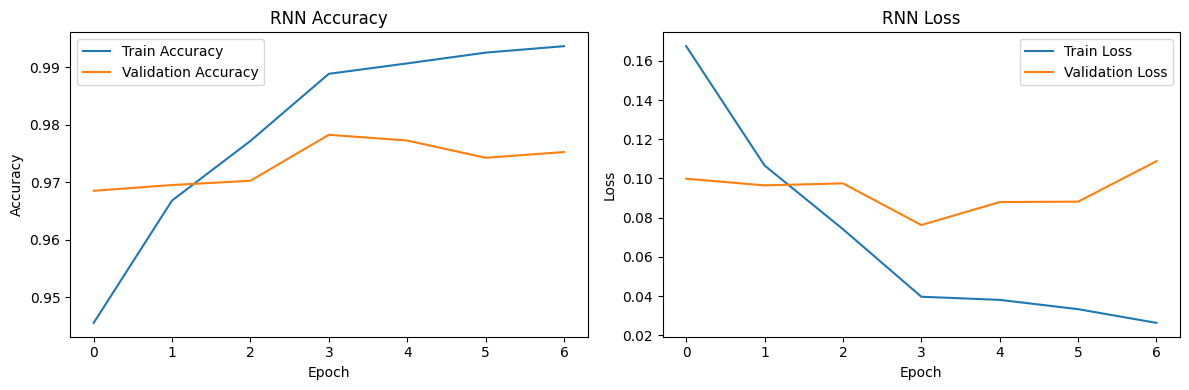

In [21]:
# ----------- Plot RNN Model Training History -----------

# I have used the plot_history function to visualize the training and validation accuracy and loss for the RNN model
plot_history(rnn_history, 'RNN')


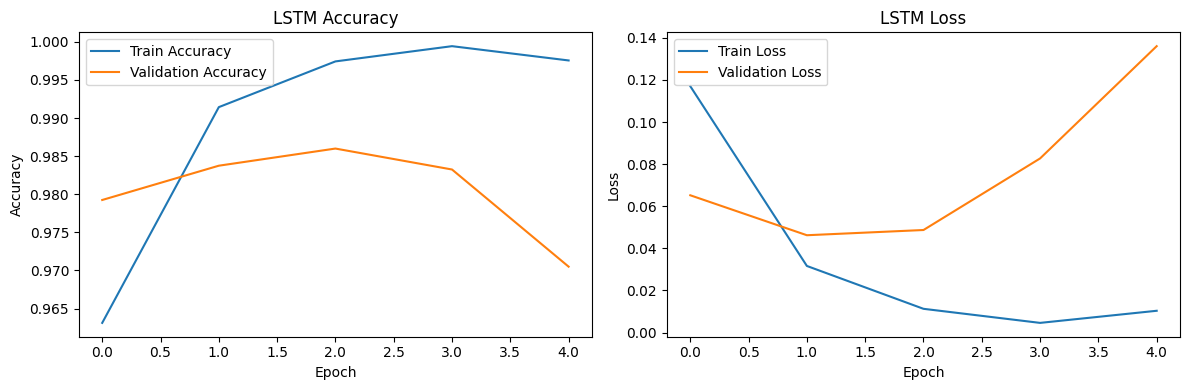

In [22]:
# ----------- Plot LSTM Model Training History -----------

# I have used the plot_history function to visualize the training and validation accuracy and loss for the LSTM model
plot_history(lstm_history, 'LSTM')


In [24]:
!pip install gensim
import gensim.downloader as api

# Download pretrained Word2Vec model (takes time and space ~1.6GB)
word2vec_model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [25]:
import gensim.downloader as api

# Download pretrained Word2Vec model (this may take time and space ~1.6GB)
word2vec_model = api.load("word2vec-google-news-300")


In [26]:
embedding_dim = 300  # Word2Vec Google News vectors are 300-dimensional
word_index = tokenizer.word_index
num_words = min(10000, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i >= num_words:
        continue
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

word2vec_lstm_model = Sequential()
word2vec_lstm_model.add(Embedding(input_dim=num_words,
                                   output_dim=embedding_dim,
                                   weights=[embedding_matrix],
                                   input_length=max_len,
                                   trainable=False))  # freeze embeddings
word2vec_lstm_model.add(LSTM(64))
word2vec_lstm_model.add(Dense(1, activation='sigmoid'))

word2vec_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
word2vec_lstm_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,000,000 (11.44 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,000,000 (11.44 MB)

In [28]:
word2vec_history = train_model(word2vec_lstm_model, X_train_pad, y_train, X_test_pad, y_test, 'word2vec_lstm')


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9008 - loss: 0.2320
Epoch 1: val_accuracy improved from -inf to 0.96450, saving model to best_word2vec_lstm_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 214ms/step - accuracy: 0.9009 - loss: 0.2316 - val_accuracy: 0.9645 - val_loss: 0.1027
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9686 - loss: 0.0857
Epoch 2: val_accuracy improved from 0.96450 to 0.97100, saving model to best_word2vec_lstm_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 143ms/step - accuracy: 0.9686 - loss: 0.0857 - val_accuracy: 0.9710 - val_loss: 0.0978
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9757 - loss: 0.0667
Epoch 3: val_accuracy improved from 0.97100 to 0.97450, saving model to best_word2vec_lstm_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 155ms/step - accuracy: 0.9757 - loss: 0.0668 - val_accuracy: 0.9745 - val_loss: 0.0806
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9784 - loss: 0.0660
Epoch 4: val_accuracy improved from 0.97450 to 0.97575, saving model to best_word2vec_lstm_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 148ms/step - accuracy: 0.9784 - loss: 0.0659 - val_accuracy: 0.9758 - val_loss: 0.0723
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9835 - loss: 0.0489
Epoch 5: val_accuracy improved from 0.97575 to 0.98050, saving model to best_word2vec_lstm_model.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 140ms/step - accuracy: 0.9835 - loss: 0.0489 - val_accuracy: 0.9805 - val_loss: 0.0639
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9883 - loss: 0.0374
Epoch 6: val_accuracy did not improve from 0.98050
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 143ms/step - accuracy: 0.9883 - loss: 0.0374 - val_accuracy: 0.9795 - val_loss: 0.0688
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9869 - loss: 0.0378
Epoch 7: val_accuracy did not improve from 0.98050
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - accuracy: 0.9869 - loss: 0.0378 - val_accuracy: 0.9780 - val_loss: 0.0643
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9899 - loss: 0.0321
Epoch 8: val_accuracy did not improve from 0.98050
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 151ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.9790 - val_loss: 0.0830
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.


125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step
Accuracy: 0.9805
Confusion Matrix:
[[1951   63]
 [  15 1971]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2014
         1.0       0.97      0.99      0.98      1986

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



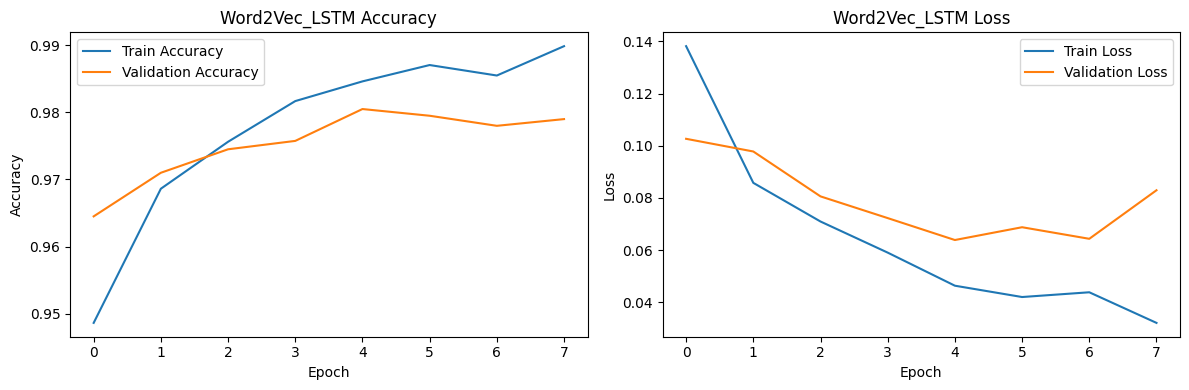

In [29]:
# I have to evaluate the Word2Vec + LSTM model on the test data
evaluate_model(word2vec_lstm_model, X_test_pad, y_test)

# I have to plot training history to see how the model performed over epochs
plot_history(word2vec_history, 'Word2Vec_LSTM')


In [30]:
def predict_sentiment(text):
    # I have to clean the input text using the same preprocessing used during training
    cleaned_input = preprocess_text(text)

    # I have to convert the cleaned text into a sequence of integers using the tokenizer
    sequence = tokenizer.texts_to_sequences([cleaned_input])

    # I have to pad the sequence so it matches the input size expected by the model
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')

    # I have to make a prediction using the trained LSTM model
    prediction = lstm_model.predict(padded_sequence)[0][0]

    # If prediction > 0.5, it's classified as "True", otherwise "Fake"
    label = "True" if prediction > 0.5 else "Fake"

    # I have to calculate confidence score (how sure the model is)
    confidence = prediction if prediction > 0.5 else 1 - prediction
    confidence_percent = round(confidence * 100, 2)  # Convert it to percentage

    # I have to return a readable string with the prediction and confidence
    return f"Prediction: {label} ({confidence_percent}% confidence)"


In [31]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00


In [32]:
import gradio as gr

# I have to create a Gradio interface to interact with my sentiment prediction function
iface = gr.Interface(
    fn=predict_sentiment,  # I have to connect the prediction function here
    inputs=gr.Textbox(lines=2, placeholder="Enter a tweet..."),  # I have to take user input through a text box
    outputs=gr.Text()  # I have to show the prediction result as plain text output
)


In [33]:
# I have to launch the web interface so users can start interacting with the model
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://029199ba3445afa0e2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
